In [1]:
import pandas as pd
from fbprophet import Prophet 

import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [2]:
# df = pd.read_csv('../data/BeerWineLiquor.csv')

In [3]:
df

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
...,...,...
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      324 non-null    object
 1   y       324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


The way the Prophet library works is that time column name should be 'ds' and y column name should be 'y'. So, we will rename the columns.

In [4]:
df.columns = ['ds', 'y']

In [5]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


Also, 'ds' column should be datetime object.

In [7]:
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [10]:
# fit model - ignore train/test split for now 
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


It did not find weekly or daily seasonality so it's disabled automatically. It makes sense because it is monthly data. If I know the data has weekly or daily seasonality, we can set the parameters to be True.

In [11]:
# future dataframe - placeholder object
future = m.make_future_dataframe(periods=24, freq='MS')  # one period = one row = 1 month for this data

In [12]:
# start of the future df is same as the original data 
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [13]:
# end of the future df is original + 24 periods (2 years)
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [14]:
# predict the future on the model for the given future df 
forecast = m.predict(future)

In [15]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1777.750825,1144.641893,1468.227028,1777.750825,1777.750825,-461.808985,-461.808985,-461.808985,-461.808985,-461.808985,-461.808985,0.0,0.0,0.0,1315.941840
1,1992-02-01,1780.417028,1194.069466,1514.725599,1780.417028,1780.417028,-426.178759,-426.178759,-426.178759,-426.178759,-426.178759,-426.178759,0.0,0.0,0.0,1354.238270
2,1992-03-01,1782.911219,1443.128763,1757.458354,1782.911219,1782.911219,-178.363746,-178.363746,-178.363746,-178.363746,-178.363746,-178.363746,0.0,0.0,0.0,1604.547472
3,1992-04-01,1785.577422,1425.630910,1745.351076,1785.577422,1785.577422,-195.905793,-195.905793,-195.905793,-195.905793,-195.905793,-195.905793,0.0,0.0,0.0,1589.671629
4,1992-05-01,1788.157619,1670.380325,2005.761332,1788.157619,1788.157619,45.003300,45.003300,45.003300,45.003300,45.003300,45.003300,0.0,0.0,0.0,1833.160919


In [16]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [17]:
# take only columns that we are interested in 
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail()

,ds,yhat_lower,yhat_upper,yhat
343,2020-08-01,5080.001880,5412.719994,5240.951965
344,2020-09-01,4915.632464,5250.412723,5083.536159
345,2020-10-01,5032.365931,5360.507018,5190.066742
346,2020-11-01,5167.902838,5508.703656,5339.186731
347,2020-12-01,6181.626903,6512.564774,6333.945653


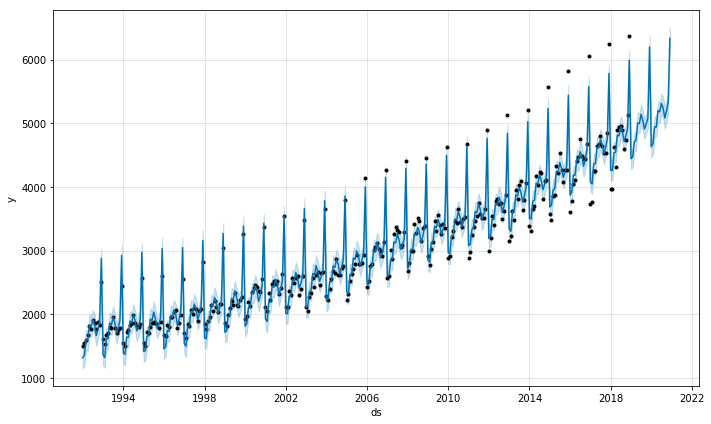

In [21]:
# Prophet's own plotting tool to see 
m.plot(forecast);

(735234.0, 737791.0)

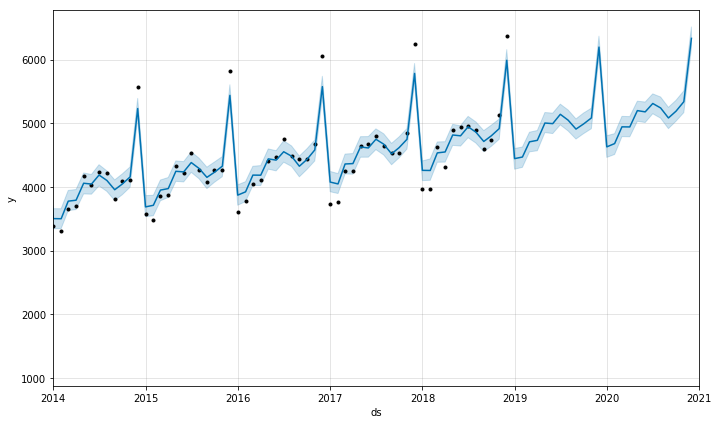

In [25]:
m.plot(forecast);
plt.xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2021-01-01'))

/Users/minkyung/Dropbox/mk-personal-repo/time-series-analysis/venv-timeseries/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/minkyung/Dropbox/mk-personal-repo/time-series-analysis/venv-timeseries/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/minkyung/Dropbox/mk-personal-repo/time-series-analysis/venv-timeseries/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


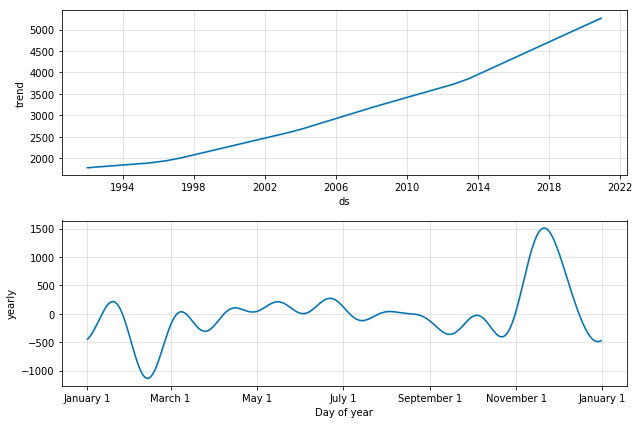

In [26]:
m.plot_components(forecast);